In [2]:
import cv2
import doxapy

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [3]:
input_image_path = ['./dibco2009/DIBC02009_Test_images-handwritten/dibco_img0001.tif',
                    './dibco2009/DIBC02009_Test_images-handwritten/dibco_img0002.tif',
                    './dibco2009/DIBC02009_Test_images-handwritten/dibco_img0003.tif',
                    './dibco2009/DIBC02009_Test_images-handwritten/dibco_img0004.tif',
                    './dibco2009/DIBC02009_Test_images-handwritten/dibco_img0005.tif']

gt_images_path = ['./dibco2009/DIBC02009_Test_images-handwritten/dibco_img0001_gt.tif',
                  './dibco2009/DIBC02009_Test_images-handwritten/dibco_img0002_gt.tif',
                  './dibco2009/DIBC02009_Test_images-handwritten/dibco_img0003_gt.tif',
                  './dibco2009/DIBC02009_Test_images-handwritten/dibco_img0004_gt.tif',
                  './dibco2009/DIBC02009_Test_images-handwritten/dibco_img0005_gt.tif']

input_images = []

gt_images = []

for i in range(len(input_image_path)):
    input_images.append(cv2.imread(input_image_path[i], cv2.IMREAD_GRAYSCALE))
    gt_images.append(cv2.imread(gt_images_path[i], cv2.IMREAD_GRAYSCALE))

In [4]:
imgs_doxapy = input_images.copy()

su = doxapy.Binarization(doxapy.Binarization.Algorithms.SU)

for img in imgs_doxapy:
    su.initialize(img)
    su.to_binary(img, {"window": 30})

In [5]:
from binarization.Su import Su_Binarizator

repr_su = Su_Binarizator(window_size = 3, N_min = 3).fit(input_images.copy())

In [6]:
from binarization.evaluation import evaluate
from binarization.evaluation import show_metrics_table  

doxapy_res = evaluate(imgs_doxapy, gt_images, print_results=False) 
repr_res = evaluate(repr_su, gt_images, print_results=False) 

show_metrics_table({"Doxapy Su": doxapy_res, "Reproduced Su": repr_res})

+-------------------------------------------+-------------+-----------------+
| Metric                                    |   Doxapy Su |   Reproduced Su |
+===========================================+=============+=================+
| Accuracy (%)                              |       98.52 |           94.84 |
+-------------------------------------------+-------------+-----------------+
| F-measure                                 |       87.71 |           69.09 |
+-------------------------------------------+-------------+-----------------+
| Matthews Correlation Coefficient          |        0.88 |            0.68 |
+-------------------------------------------+-------------+-----------------+
| Peak Signal-to-Noise Ratio (PSNR)         |       18.31 |           12.87 |
+-------------------------------------------+-------------+-----------------+
| Normalized Root Mean Square Error (NRM)   |        0.01 |            0.22 |
+-------------------------------------------+-------------+-----

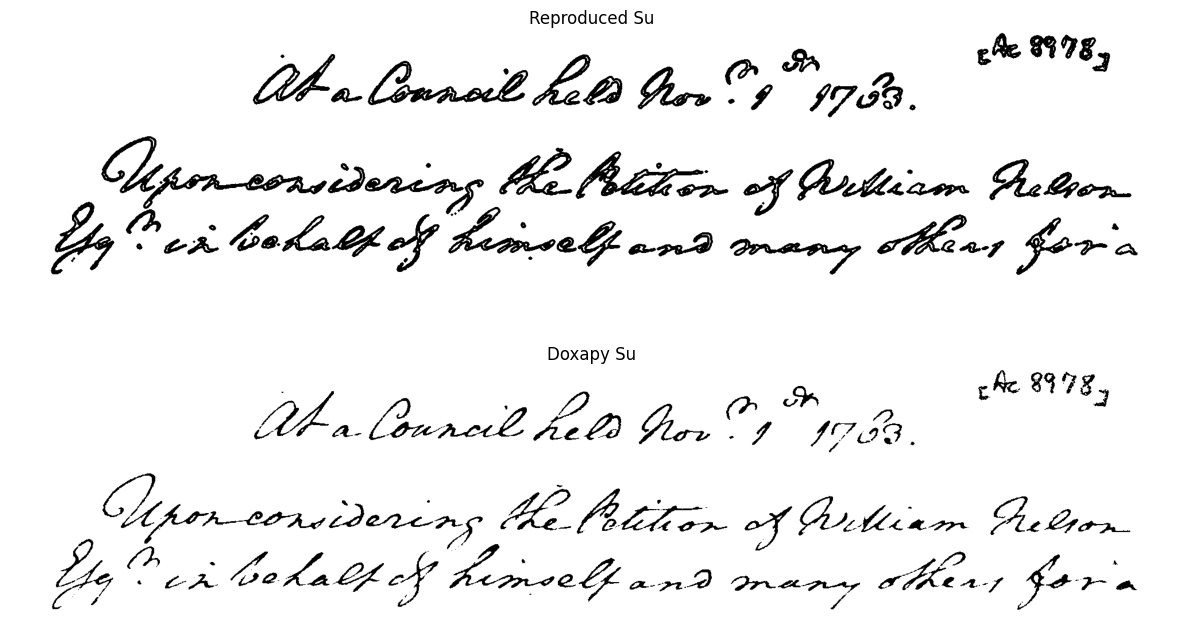

In [8]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.title('Reproduced Su')
plt.imshow(repr_su[0], cmap='gray')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.title('Doxapy Su')
plt.imshow(imgs_doxapy[0], cmap='gray')
plt.axis('off')

plt.show()